# Week 7

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import requests
import os
import regex as re
import nltk

## Part 1: Processing real text (from out on the inter-webs)

Reading of chapter 3 of the book

## Part 2: Words that characterize the rappers

### Part 2.1: Comparing word-counts of West-coast and East-coast rappers.

**Step one: TF List**

The goal of this exercise is to create your own wordclouds, characterizing the two coasts.

You will want to aggregate the text into two long lists. One based on all the text from the West coast pages, and one based on all the text from the East coast pages. In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. This list is called a ***Term Frequency*** (or TF) list. Let's build our own TF lists.

> * Tokenize the pages into individual strings

In [2]:
# Create the corpus
east_corpus_root = "../files/eastcoasttexts"
west_corpus_root = "../files/westcoasttexts"

east_corpus = nltk.corpus.PlaintextCorpusReader(east_corpus_root, '.*\.txt')
west_corpus = nltk.corpus.PlaintextCorpusReader(west_corpus_root, '.*\.txt')



In [3]:
# Tokenize the pages into individual strings
east_pages = []
west_pages = []

for fileid in east_corpus.fileids():
    east_pages.append(east_corpus.raw(fileid))

for fileid in west_corpus.fileids():
    west_pages.append(west_corpus.raw(fileid))



> * Remove all punctuation from your list of tokens

In [4]:
# Remove the punctuation from the pages
east_pages = [re.sub(r'[^\w\s]', '', page) for page in east_pages]
west_pages = [re.sub(r'[^\w\s]', '', page) for page in west_pages]

> * Set everything to lower case

In [5]:
# Set to lower case
east_pages = [page.lower() for page in east_pages]
west_pages = [page.lower() for page in west_pages]


> * Create your TF list for each coast.

In [6]:
# Merge the pages into one string
east_string = ""
west_string = ""

for page in east_pages:
    east_string += page

for page in west_pages:
    west_string += page

# Create a Term frequency list for each category (east and west) by using nltk.FreqDist

east_freq = nltk.FreqDist(east_string.split())
west_freq = nltk.FreqDist(west_string.split())

# Create a list of the 100 most common words in each category
east_top100 = east_freq.most_common(100)
west_top100 = west_freq.most_common(100)

print("East Coast Top 100 Words")
print(east_top100)

print("West Coast Top 100 Words")
print(west_top100)

East Coast Top 100 Words
[('the', 28851), ('and', 15798), ('in', 13164), ('a', 10815), ('of', 10768), ('on', 9712), ('to', 9345), ('was', 7636), ('his', 7234), ('with', 6625), ('he', 6330), ('as', 4642), ('for', 4520), ('album', 4366), ('released', 3693), ('by', 3556), ('from', 3454), ('that', 3430), ('at', 3252), ('is', 2545), ('an', 2304), ('it', 2279), ('music', 2163), ('which', 2025), ('new', 1899), ('also', 1751), ('first', 1739), ('single', 1620), ('i', 1613), ('her', 1595), ('song', 1552), ('after', 1462), ('she', 1320), ('has', 1308), ('records', 1279), ('be', 1223), ('had', 1184), ('rapper', 1161), ('one', 1158), ('featuring', 1075), ('dj', 1042), ('would', 1039), ('york', 1032), ('hip', 1010), ('their', 1002), ('hop', 1001), ('featured', 968), ('albums', 967), ('him', 961), ('rap', 952), ('release', 931), ('2', 926), ('debut', 918), ('studio', 916), ('later', 913), ('group', 909), ('this', 904), ('two', 903), ('up', 897), ('were', 878), ('career', 872), ('life', 866), ('time'

**Step two: Word weights**

**normalization..** Let me start with an example. The word `california` occurs 458 in the West-coast TF list and 87 times in the East-coast TF list, thus I set it's West-coast weight to

$$w_\textrm{california}^{(m)} = \frac{458}{87 + c} = 4.28.$$

Similarly, its East-coast weight is 

$$w_\textrm{california}^{(d)} = \frac{87}{458 + c} = 0.18.$$

In both cases, I add the constant $c$ to the denominator in case a word occurs zero times. You can play around with the size of $c$ to understand the effect of chosing small/large values of it.

In general for some token $t$ with term frequency $\textrm{TF}^{(u)}_t$, in coast $u$ where $u \in \{w,e\}$, we define the weight as:

$$w_{t}^{(w)} = \frac{\textrm{TF}^{(w)}_t}{ \textrm{TF}^{(e)}_t + c}, \qquad \textrm{and} \qquad w_{t}^{(e)} = \frac{\textrm{TF}^{(e)}_t}{ \textrm{TF}^{(w)}_t + c}. $$

Thus, now we're ready to lists for each univers, where the ranking of token $t$ on list $u$ is given by $\textrm{TF}^{(u)}_t \times w_{t}^{(u)}$.

> * Create your TF-TR list for each coast.


In [7]:
# Compute weights for each word in each category
east_weights = {}
west_weights = {}

c = 40
for word in east_freq:
    east_weights[word] = east_freq[word] / (west_freq[word] + c)

for word in west_freq:
    west_weights[word] = west_freq[word] / (east_freq[word] + c)


> * Check out top 10 for each coast. Does it make sense?

In [8]:
print("East Coast Weights (top 10)")
print(sorted(east_weights.items(), key=lambda x: x[1], reverse=True)[:10])

print("West Coast Weights")
print(sorted(west_weights.items(), key=lambda x: x[1], reverse=True)[:10])


East Coast Weights (top 10)
[('oneal', 7.840909090909091), ('cena', 7.673469387755102), ('york', 6.216867469879518), ('jayz', 5.185185185185185), ('brooklyn', 5.153846153846154), ('dmx', 4.3478260869565215), ('nas', 4.2439024390243905), ('wutang', 4.218181818181818), ('ja', 4.212765957446808), ('writer', 4.088235294117647)]
West Coast Weights
[('e40', 4.269230769230769), ('lamar', 4.2631578947368425), ('gomez', 3.6666666666666665), ('dre', 3.6587301587301586), ('california', 3.6554621848739495), ('snoop', 3.55045871559633), ('dogg', 3.0), ('cube', 2.838709677419355), ('compton', 2.6226415094339623), ('angeles', 2.4936708860759493)]


The takehome here is that we get a good ranking by combining the term frequency with some weighting scheme. But, as we will see below, the TR weight that I created is not the only possible weight. There are many other options.

-----------

PS. Above in creating the ratios, I'm assuming that the coast pages have a comparable number of words in them. That's pretty much true (up to a factor of 2). And while the approximation is OK for our purposes, it's not true in general. If you'd like an extra challenge, you can figure out how to account for differences in the size of each coast corpus.

**Step three: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step four: Draw the wordclouds**

In [9]:
import wordcloud

> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.

In [10]:
# Create word list (where each word is repeated by its weight)
east_wordlist = []
west_wordlist = []

for word in east_weights:
    east_wordlist += [word] * int(east_weights[word])

for word in west_weights:
    west_wordlist += [word] * int(west_weights[word])

> * Now, create a word-cloud for each cost. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)

In [11]:
word_cloud_east = wordcloud.WordCloud(collocations=False).generate(" ".join(east_wordlist))
word_cloud_west = wordcloud.WordCloud(collocations=False).generate(" ".join(west_wordlist))

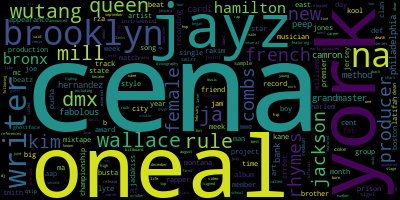

In [12]:
word_cloud_east.to_image()

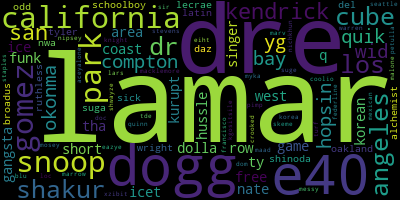

In [13]:
word_cloud_west.to_image()

# Community detection


Now that we have worked hard on text analysis, it is time to go back to our network! 

Before we begin, let's watch a great lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: [Communities in networks](https://www.dropbox.com/scl/fi/jw6prey62yyc0cpjnk4nv/Communities.mp4?rlkey=62lulz7b238rmiuaenbm8ts8t&dl=0). 

In [14]:
def build_rappers_network():

    EastCoastRappers = pd.read_csv("../files/EastCoastRappers.csv")
    WestCoastRappers = pd.read_csv("../files/WestCoastRappers.csv")
    BothCoastRappers = pd.read_csv("../files/BothCoastRappers.csv")

    G = nx.DiGraph()
    
    # Add nodes to the graph
    for index, row in EastCoastRappers.iterrows():
        G.add_node(row['WikipediaPageName'], region='EastCoast')

    for index, row in WestCoastRappers.iterrows():
        G.add_node(row['WikipediaPageName'], region='WestCoast')

    for index, row in BothCoastRappers.iterrows():
        G.add_node(row['WikipediaPageName'], region='BothCoast')

    # Setup wikipedia requests
    WIKI_REQUEST_URL = "https://en.wikipedia.org/w/api.php?"
    params = {
        'action': 'query',
        'format': 'json',
        'prop': 'links',
        'pllimit': 'max',
        'titles': ''
    }

    # Add edges to the graph 
    # It should have an edge between two rappers if their wikipedia pages link to each other
    for index, row in EastCoastRappers.iterrows():
        params['titles'] = row['WikipediaPageName']
        request = requests.get(WIKI_REQUEST_URL, params=params).json().get('query').get('pages').popitem()[1].get('links')
        for link in request:
            if (link['title'] in G.nodes()):
                G.add_edge(row['WikipediaPageName'], link['title'])

    for index, row in WestCoastRappers.iterrows():
        params['titles'] = row['WikipediaPageName']
        request = requests.get(WIKI_REQUEST_URL, params=params).json().get('query').get('pages').popitem()[1].get('links')
        for link in request:
            if (link['title'] in G.nodes()):
                G.add_edge(row['WikipediaPageName'], link['title'])

    for index, row in BothCoastRappers.iterrows():
        params['titles'] = row['WikipediaPageName']
        request = requests.get(WIKI_REQUEST_URL, params=params).json().get('query').get('pages').popitem()[1].get('links')
        for link in request:
            if (link['title'] in G.nodes()):
                G.add_edge(row['WikipediaPageName'], link['title'])
    
    return G

*Exercise 2*: Use the concept of modularity to explore how _community-like_ the coasts are.
> 
> * Explain the concept of modularity in your own words.
> * Consider the undirected version of the entire network, including both coasts.
> * Now create your own partition into communities, where all west-coast rappers are one community and all the east-coast rappers are another community. That's all you need, **now calculate the modularity of this partition**. Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the coasts good communities?
> * Would you expect this result in light of what we have found in the previous exercises?

In [15]:
G = build_rappers_network()
G = G.to_undirected()

In [19]:
# Get the most connnected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Create a community partition of the graph by region
# Partition is a list of sets of nodes
east_nodes = [ node for node in G.nodes() if G.nodes[node]['region'] == 'EastCoast' ]
west_nodes = [ node for node in G.nodes() if G.nodes[node]['region'] == 'WestCoast' ]
both_nodes = [ node for node in G.nodes() if G.nodes[node]['region'] == 'BothCoast' ]

partition = [set(east_nodes), set(west_nodes), set(both_nodes)]

print("Community Partition of the Graph")
print(partition)

# Compute the modularity of the graph
modularity = nx.algorithms.community.quality.modularity(G, partition)
print("Modularity of the graph: {}".format(modularity))

Community Partition of the Graph
[{'ASAP Ferg', 'Amil', 'Scott La Rock', 'Kirk Knight', 'Frenchie (rapper)', 'Chad Hugo', 'M. K. Asante', 'Ice Spice', 'Swizz Beatz', 'Roc Marciano', 'Will Smith', '88-Keys', 'Grafh', 'Mase', 'Call Me Ace', 'Louis Logic', 'Prolyphic', 'Vinylz', 'Jimmy Wopo', 'DJ Chuck Chillout', 'Njena Reddd Foxxx', 'Silkski', 'Bronx Style Bob', 'MF Doom', 'Large Professor', 'Wordsworth (rapper)', 'Akrobatik', 'E.D.I. Mean', 'AraabMuzik', 'Islord', 'Ed Lover', 'ZillaKami', 'Lil Tecca', "Lil' Cease", 'Focus...', 'Capital Steez', 'ASAP Rocky', 'Consequence (rapper)', 'AZ (rapper)', 'Neo da Matrix', 'Phife Dawg', 'D-Nice', 'DJ Drama', 'Lady B', 'Shock G', 'Doug E. Fresh', 'Young M.A', 'Bkorn', 'Prodigy (rapper)', 'Wyldfyer', 'Benzino', 'DJ Webstar', 'RZA', 'Le1f', 'Chris Webby', 'Myzery', 'Jae Millz', 'Grandmaster Caz', 'DJ Charlie Chase', 'Kool G Rap', 'French Montana', 'Justina Valentine', 'Heather B. Gardner', 'Q-Tip (musician)', 'Mach-Hommy', 'Cordae', 'The Audible Doct

*Exercise 3*: Community detection, considering each coast separately. 

> * Consider the network of rappers for each coast separately. 
>    - **Note**. For this exercise, it's OK to just pick one of the coasts. 
>    - If you want to work with the entire network. Then run community detection on each coast separately, then combine results to get a list containing all communities from both parts of the network.
>    - (The reason for this is that the strong split between the coasts can confuse the algorithm a bit).

In [20]:
# Get the subgraph of the graph that contains the East Coast and Both coast rappers
east_graph = G.subgraph(east_nodes + both_nodes)

> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities in each network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the coasts as communities? What does this comparison reveal about them?
    >   * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
    >   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.

Partition: {'6ix9ine': 0, '9th Prince': 1, '22Gz': 0, '38 Spesh': 2, 'The 45 King': 3, '50 Cent': 0, '60 Second Assassin (rapper)': 1, '88-Keys': 4, 'Sammy Adams': 5, 'Adeem (rapper)': 1, 'Aesop Rock': 4, 'Afu-Ra': 4, 'Akir': 4, 'Akrobatik': 4, 'Alias (musician)': 1, 'Hoodie Allen': 0, 'Amil': 3, 'Antoinette (rapper)': 4, 'Aone Beats': 2, 'Apache (rapper)': 3, 'Apathy (rapper)': 4, 'AR-Ab': 0, 'AraabMuzik': 0, 'Arkatech Beatz': 2, 'M. K. Asante': 4, 'Asheru': 4, 'The Audible Doctor': 4, 'Awkwafina': 7, 'AZ (rapper)': 2, 'Apani B. Fly': 4, 'DJ Babu': 4, 'Bahamadia': 4, 'Marty Baller': 5, 'Charli Baltimore': 3, 'Afrika Bambaataa': 8, 'Bodega Bamz': 5, 'Azealia Banks': 2, 'Lloyd Banks': 0, 'MC Paul Barman': 4, 'Mark Batson': 0, 'The Beat Bully': 0, 'Jahlil Beats': 0, 'Beedie (rapper)': 5, 'Benny the Butcher': 5, 'Benzino': 0, 'Big Body Bes': 5, 'Big Daddy Kane': 4, 'Big Pun': 4, 'Big Shug': 4, 'Bkorn': 0, 'Black Child': 3, 'Black Rob': 4, 'Black Thought': 5, 'Memphis Bleek': 3, 'Blockhead

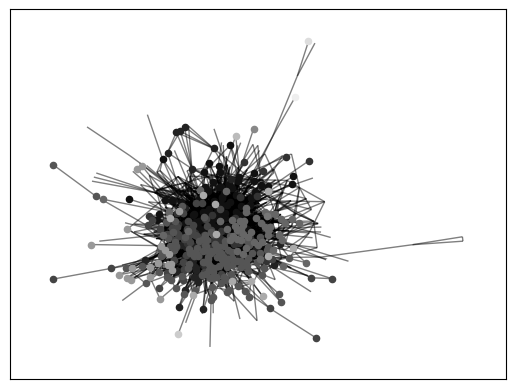

Modularity of the graph: 0.3612492924402244


In [31]:
from community import community_louvain
import matplotlib.pyplot as plt

#first compute the best partition
partition = community_louvain.best_partition(east_graph)

print("Partition: {}".format(partition))
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

#Convert the partition into a list of sets of nodes
partition = [set([node for node in partition if partition[node] == i]) for i in set(partition.values())]

# Compute the modularity of the graph
modularity = nx.algorithms.community.quality.modularity(east_graph, partition)
print("Modularity of the graph: {}".format(modularity))

*Exercise 4*: Wrap your brain around TF-IDF

First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is still to have a *term frequency* (TF) and a *weight* (IDF), but there are some additional things going on. For example, there are multiple definitions of TF. We just looked at the raw counts.

>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.

It takes into account the number of words into the document, so its size. It gives us a frequency instead of a count.

>   * What does IDF stand for?

IDF stands for "inverse document frenquency". 

>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?

- smoother curve than linear. If a word appear very often, its IDF will be less significatif.
- more practical: number are kept smaller

>   * Explain why using IDF makes stopword removal less important.

- Their weight will be smaller anyways
- We keep some of the domain-related stopword

>   * In the TR weight that I defined in Exercise 1, we take into account how frequently each word appears inside each of the two documents. Is information of word counts inside each document used in the definition of IDF on Wikipedia?

No, the raw count is the nominator of the term frequency but not present in the IDF.

I noted above that out-of-the box worked weirdly when you only have two documents. Let's see why that's the case. If we grab one of the simple definitions of IDF-weight from wikipedia

$$\log \left( \frac{N}{n_t+1} \right) + 1.$$

Where $N = 2$ is the number of documents and $n_t \in \{1,2\}$ is the number of documents containing the term $t$.

>   * What are the possible weights that a word can have?

If $N = 2$ and $n_t \in \{1,2\}$ The range of the weights can go from:
- 1, if $n_t = 1$
- $log(2/3)+1 = log(2) - log(3) + 1 = 2 -log(3) \simeq 0.41503749$ if we are setting the base of the log to 2

>   * Explain in your own words why TF-IDF might not result in ideal wordclouds when you only have two documents.

- The lack of the diversity of documents makes the term frequency limited. 
- In the IDF, the denominator can be very small, thus the result would be really high for terms appearing in both documents and really low for the one appearing in only one.
- There is a risk of overfitting for thoses two documents. 